<a href="https://colab.research.google.com/github/eygomezc/Entrega_Corte1/blob/main/intro_supervized_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

This dataset can be found at:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

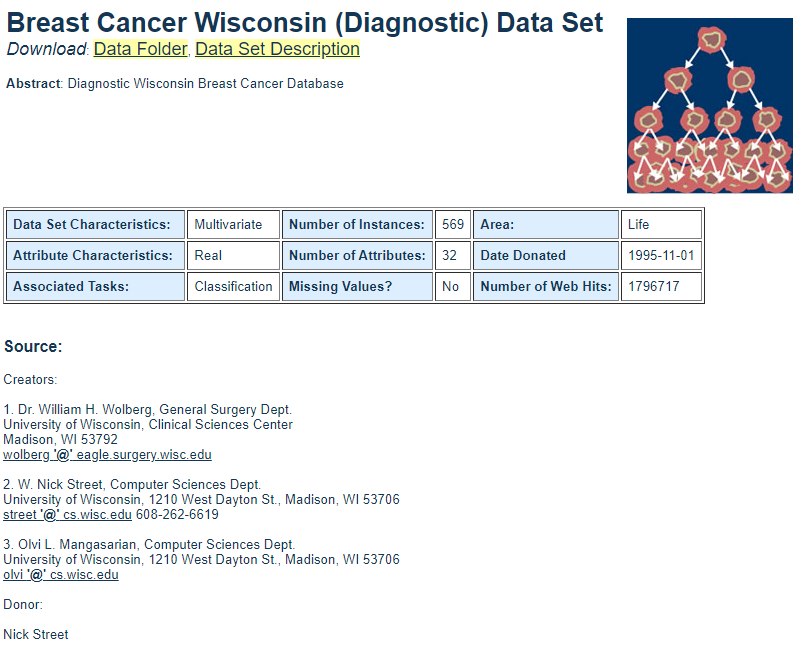


In [ ]:
Y=np.array([cancer.target]).transpose()
print(Y.shape)
X=cancer.data
print(X.shape)
np.append(X,Y, axis=1)
names=cancer.feature_names

df = pd.DataFrame(data = X, 
                  columns = labels)
display(df)


In [ ]:
display(names)

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

([<matplotlib.axis.YTick at 0x7fc293745940>,
 <a list of 2 Text major ticklabel objects>)

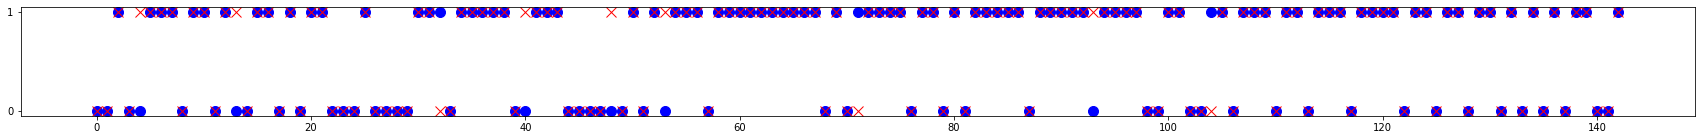

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(
    X, Y.reshape(len(Y),), stratify=Y.reshape(len(Y),), random_state=1)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(y_pred)), y_pred, 'rx', markersize=10)
plt.yticks([0,1])



In [ ]:
conf_mat=metrics.confusion_matrix(y_test,y_pred)
display(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred))

Predicted,0.0,1.0,All
Actual,,,
0.0,56,10,66
1.0,14,18,32
All,70,28,98


              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82        66
         1.0       0.64      0.56      0.60        32

    accuracy                           0.76        98
   macro avg       0.72      0.71      0.71        98
weighted avg       0.75      0.76      0.75        98



In [ ]:
TN=conf_mat[0,0]
TP=conf_mat[1,1]
FN=conf_mat[1,0]
FP=conf_mat[0,1]
print('  TN: ',TN,'  TP: ',TP,'  FN: ',FN,'  FP: ',FP)

sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)

print('sensitivity: ', sensitivity)
print('specificity: ', specificity)

  TN:  47   TP:  87   FN:  3   FP:  6
sensitivity:  0.9666666666666667
specificity:  0.8867924528301887


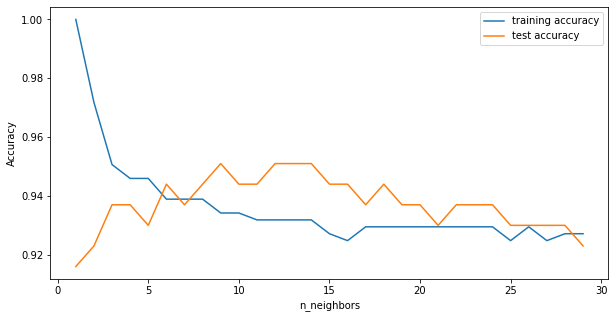

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,30)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
 
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#Diabetes Dataset
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

The Diabetes Dataset involves predicting the onset of diabetes within 5 years in given medical details.
It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:
0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).


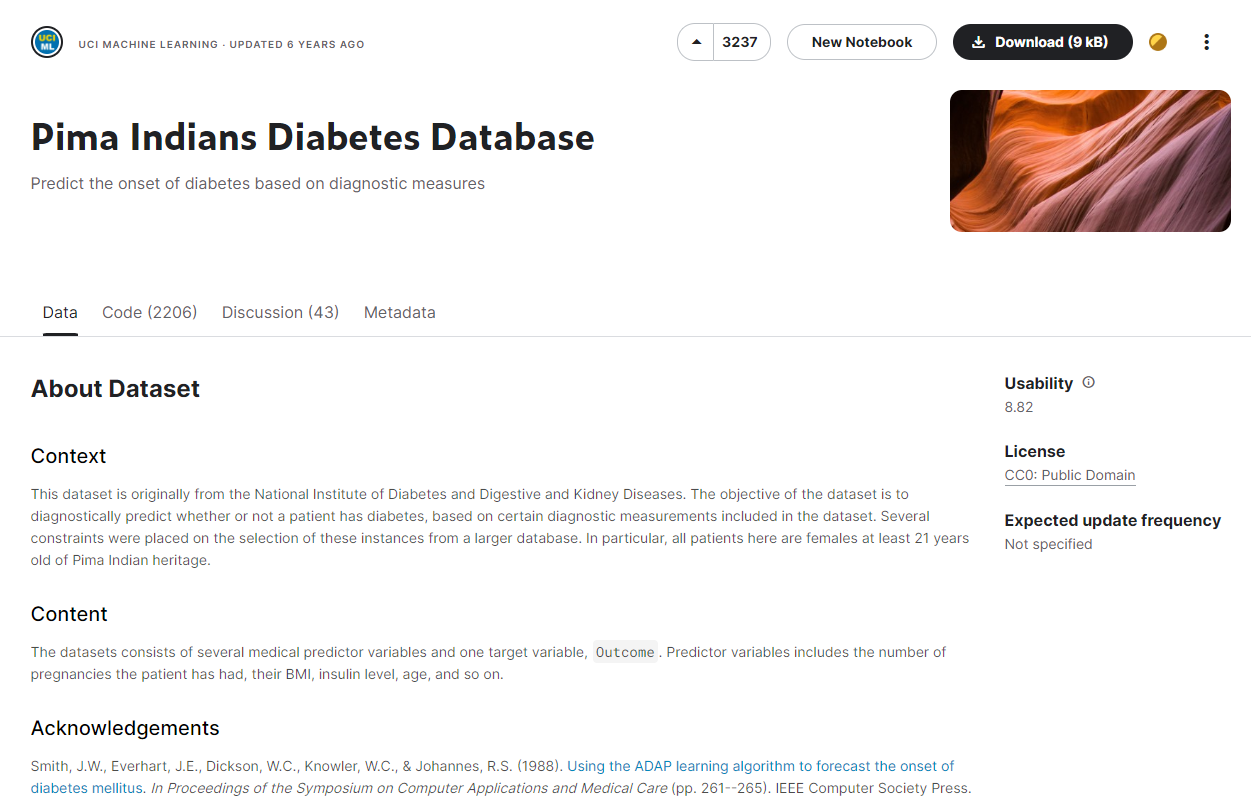

In [ ]:
# load and summarize the dataset
import pandas as pd
from pandas import read_csv
# load the dataset
url='https://sites.google.com/a/uao.edu.co/gbio_files/repository/pima-indians-diabetes.txt'
#data = pd.read_csv(url,sep=",")
dataset = read_csv(url, sep=",", header=None, names=['#pregnant','plasma_glucose','diastolic_BP','triceps_thickness','2h_insulin','BMI','diabetes_pedigree','age','class'])
# summarize the dataset
print(dataset.describe())
dataset.head()

        #pregnant  plasma_glucose  diastolic_BP  triceps_thickness  \
count  768.000000      768.000000    768.000000         768.000000   
mean     3.845052      120.894531     69.105469          20.536458   
std      3.369578       31.972618     19.355807          15.952218   
min      0.000000        0.000000      0.000000           0.000000   
25%      1.000000       99.000000     62.000000           0.000000   
50%      3.000000      117.000000     72.000000          23.000000   
75%      6.000000      140.250000     80.000000          32.000000   
max     17.000000      199.000000    122.000000          99.000000   

       2h_insulin         BMI  diabetes_pedigree         age       class  
count  768.000000  768.000000         768.000000  768.000000  768.000000  
mean    79.799479   31.992578           0.471876   33.240885    0.348958  
std    115.244002    7.884160           0.331329   11.760232    0.476951  
min      0.000000    0.000000           0.078000   21.000000    0.000

,#pregnant,plasma_glucose,diastolic_BP,triceps_thickness,2h_insulin,BMI,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values are frequently indicated by out-of-range entries; perhaps a negative number (e.g., -1) in a numeric field that is normally only positive, or a 0 in a numeric field that can never normally be 0.
Specifically, the following columns have an invalid zero minimum value:

1: Plasma glucose concentration
2: Diastolic blood pressure
3: Triceps skinfold thickness
4: 2-Hour serum insulin
5: Body mass index

#Mark Missing Values

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(dataset.head(20))
print(dataset.tail(20))

    #pregnant  plasma_glucose  diastolic_BP  triceps_thickness  2h_insulin  \
0   6          148             72            35                 0            
1   1          85              66            29                 0            
2   8          183             64            0                  0            
3   1          89              66            23                 94           
4   0          137             40            35                 168          
5   5          116             74            0                  0            
6   3          78              50            32                 88           
7   10         115             0             0                  0            
8   2          197             70            45                 543          
9   8          125             96            0                  0            
10  4          110             92            0                  0            
11  10         168             74            0                  

<ipython-input-13-668ecd1a3693>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
num_missing = (dataset[['plasma_glucose','diastolic_BP','triceps_thickness','2h_insulin','BMI']] == 0).sum()
print(num_missing)
dataset['class'].value_counts()



plasma_glucose       5  
diastolic_BP         35 
triceps_thickness    227
2h_insulin           374
BMI                  11 
dtype: int64


0    500
1    268
Name: class, dtype: int64

This highlights that different “missing value” strategies may be needed for different columns, e.g. to ensure that there are still a sufficient number of records left to train a predictive model.

When a predictor is discrete in nature, missingness can be directly encoded into the predictor as if it were a naturally occurring category.

In [ ]:
from numpy import nan
dataset[['plasma_glucose','diastolic_BP','triceps_thickness','2h_insulin','BMI']] = dataset[['plasma_glucose','diastolic_BP','triceps_thickness','2h_insulin','BMI']].replace(0, nan)
# count the number of nan values in each column
print(dataset.isnull().sum())

#pregnant            0  
plasma_glucose       5  
diastolic_BP         35 
triceps_thickness    227
2h_insulin           374
BMI                  11 
diabetes_pedigree    0  
age                  0  
class                0  
dtype: int64


In [ ]:
display(dataset.head(20))
display(dataset.tail(20))

,#pregnant,plasma_glucose,diastolic_BP,triceps_thickness,2h_insulin,BMI,diabetes_pedigree,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


,#pregnant,plasma_glucose,diastolic_BP,triceps_thickness,2h_insulin,BMI,diabetes_pedigree,age,class
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
749,6,162.0,62.0,NaN,NaN,24.3,0.178,50,1
750,4,136.0,70.0,NaN,NaN,31.2,1.182,22,1
751,1,121.0,78.0,39.0,74.0,39.0,0.261,28,0
752,3,108.0,62.0,24.0,NaN,26.0,0.223,25,0
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
754,8,154.0,78.0,32.0,NaN,32.4,0.443,45,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
756,7,137.0,90.0,41.0,NaN,32.0,0.391,39,0
757,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1


#Remove Rows With Missing Values
The simplest approach for dealing with missing values is to remove entire predictor(s) and/or sample(s) that contain missing values.

In [ ]:
print(dataset.shape)
# drop rows with missing values
dataset_remnan=dataset.copy()
dataset_remnan.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)
print(dataset_remnan.shape)


(768, 9)
(768, 9)
(392, 9)


In [ ]:
# split dataset into inputs and outputs
values = dataset_remnan.values
print(values.shape)
X = values[:,0:8]
y = values[:,8]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0)



(392, 9)


NAN removing
Scores for KNN
Training set score: 0.782
Test set score: 0.745


Predicted,0.0,1.0,All
Actual,,,
0.0,57,9,66
1.0,16,16,32
All,73,25,98


              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82        66
         1.0       0.64      0.50      0.56        32

    accuracy                           0.74        98
   macro avg       0.71      0.68      0.69        98
weighted avg       0.73      0.74      0.74        98

  TN:  57   TP:  16   FN:  16   FP:  9
sensitivity:  0.5
specificity:  0.8636363636363636


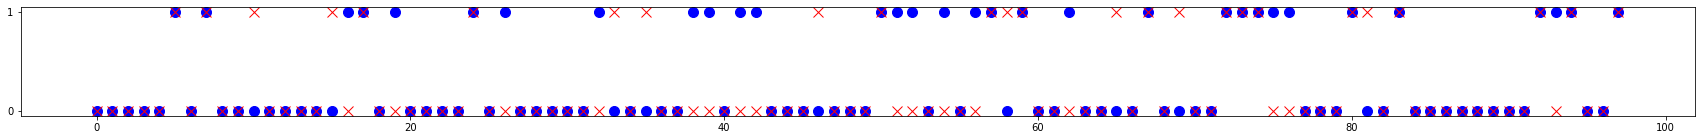

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
print('NAN removing')
print('Scores for KNN')
print("Training set score: {:.3f}".format(model_knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model_knn.score(X_test, y_test)))

y_pred = model_knn.predict(X_test)
plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(y_pred)), y_pred, 'rx', markersize=10)
plt.yticks([0,1])
conf_mat=metrics.confusion_matrix(y_test,y_pred)
display(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred))
TN=conf_mat[0,0]; TP=conf_mat[1,1]; FN=conf_mat[1,0]; FP=conf_mat[0,1]
print('  TN: ',TN,'  TP: ',TP,'  FN: ',FN,'  FP: ',FP)
sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)

Scores for Logistic Regression
Training set score: 0.786
Test set score: 0.755


Predicted,0.0,1.0,All
Actual,,,
0.0,57,9,66
1.0,15,17,32
All,72,26,98


              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83        66
         1.0       0.65      0.53      0.59        32

    accuracy                           0.76        98
   macro avg       0.72      0.70      0.71        98
weighted avg       0.75      0.76      0.75        98

  TN:  57   TP:  17   FN:  15   FP:  9
sensitivity:  0.53125
specificity:  0.8636363636363636


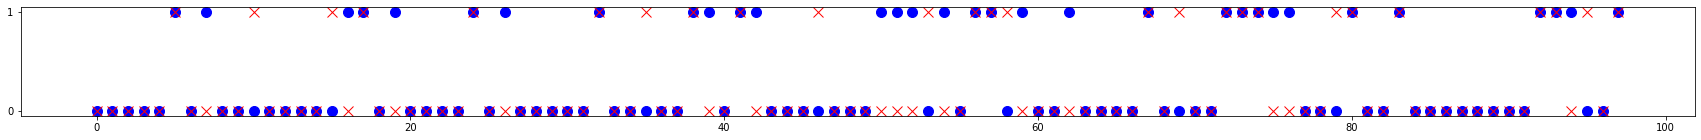

In [ ]:
model_logr = LogisticRegression(max_iter=10000)
model_logr.fit(X_train, y_train)
print('Scores for Logistic Regression')
print("Training set score: {:.3f}".format(model_logr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model_logr.score(X_test, y_test)))

y_pred = model_logr.predict(X_test)
plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(y_pred)), y_pred, 'rx', markersize=10)
plt.yticks([0,1])
conf_mat=metrics.confusion_matrix(y_test,y_pred)
display(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred))
TN=conf_mat[0,0]; TP=conf_mat[1,1]; FN=conf_mat[1,0]; FP=conf_mat[0,1]
print('  TN: ',TN,'  TP: ',TP,'  FN: ',FN,'  FP: ',FP)
sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)

Scores for SVM
Training set score: 0.354
Test set score: 0.378


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Predicted,0.0,1.0,All
Actual,,,
0.0,5,61,66
1.0,0,32,32
All,5,93,98


              precision    recall  f1-score   support

         0.0       1.00      0.08      0.14        66
         1.0       0.34      1.00      0.51        32

    accuracy                           0.38        98
   macro avg       0.67      0.54      0.33        98
weighted avg       0.79      0.38      0.26        98

  TN:  5   TP:  32   FN:  0   FP:  61
sensitivity:  1.0
specificity:  0.07575757575757576


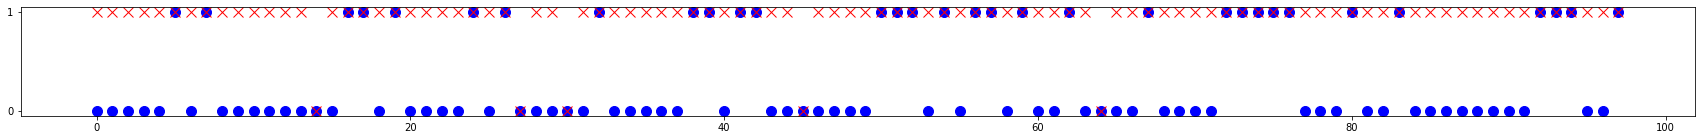

In [ ]:
model_svm = LinearSVC(random_state=0, max_iter=10000)
model_svm.fit(X_train, y_train)
print('Scores for SVM')
print("Training set score: {:.3f}".format(model_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model_svm.score(X_test, y_test)))

y_pred = model_svm.predict(X_test)
plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(y_pred)), y_pred, 'rx', markersize=10)
plt.yticks([0,1])
conf_mat=metrics.confusion_matrix(y_test,y_pred)
display(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred))
TN=conf_mat[0,0]; TP=conf_mat[1,1]; FN=conf_mat[1,0]; FP=conf_mat[0,1]
print('  TN: ',TN,'  TP: ',TP,'  FN: ',FN,'  FP: ',FP)
sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)

Scores for Random Forest
Training set score: 0.354
Test set score: 0.378


Predicted,0.0,1.0,All
Actual,,,
0.0,57,9,66
1.0,15,17,32
All,72,26,98


              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83        66
         1.0       0.65      0.53      0.59        32

    accuracy                           0.76        98
   macro avg       0.72      0.70      0.71        98
weighted avg       0.75      0.76      0.75        98

  TN:  57   TP:  17   FN:  15   FP:  9
sensitivity:  0.53125
specificity:  0.8636363636363636


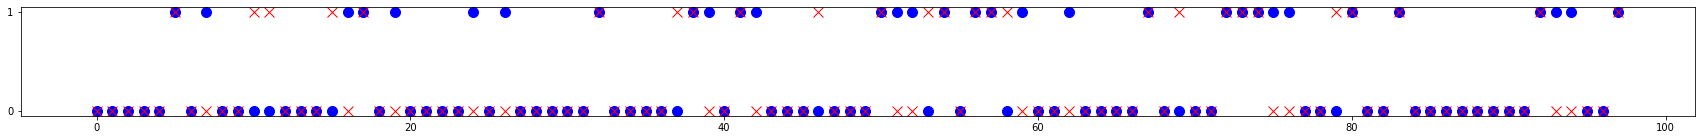

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=2)
forest.fit(X_train, y_train)
print('Scores for Random Forest')
print("Training set score: {:.3f}".format(model_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model_svm.score(X_test, y_test)))

y_pred = forest.predict(X_test)
plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(y_pred)), y_pred, 'rx', markersize=10)
plt.yticks([0,1])
conf_mat=metrics.confusion_matrix(y_test,y_pred)
display(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred))
TN=conf_mat[0,0]; TP=conf_mat[1,1]; FN=conf_mat[1,0]; FP=conf_mat[0,1]
print('  TN: ',TN,'  TP: ',TP,'  FN: ',FN,'  FP: ',FP)
sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)

Scores for Random Forest
Training set score: 0.354
Test set score: 0.378


Predicted,0.0,1.0,All
Actual,,,
0.0,55,11,66
1.0,9,23,32
All,64,34,98


              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        66
         1.0       0.68      0.72      0.70        32

    accuracy                           0.80        98
   macro avg       0.77      0.78      0.77        98
weighted avg       0.80      0.80      0.80        98

  TN:  55   TP:  23   FN:  9   FP:  11
sensitivity:  0.71875
specificity:  0.8333333333333334


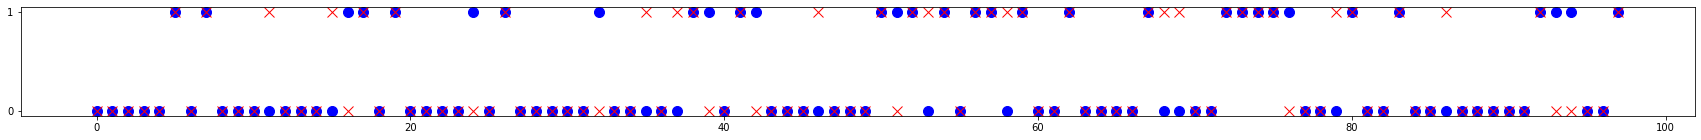

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=1000, max_depth=2, random_state=2)
GBC.fit(X_train, y_train)
print('Scores for Random Forest')
print("Training set score: {:.3f}".format(model_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model_svm.score(X_test, y_test)))

y_pred = GBC.predict(X_test)
plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(y_pred)), y_pred, 'rx', markersize=10)
plt.yticks([0,1])
conf_mat=metrics.confusion_matrix(y_test,y_pred)
display(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred))
TN=conf_mat[0,0]; TP=conf_mat[1,1]; FN=conf_mat[1,0]; FP=conf_mat[0,1]
print('  TN: ',TN,'  TP: ',TP,'  FN: ',FN,'  FP: ',FP)
sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)


Scores for Random Forest
Training set score: 0.354
Test set score: 0.378


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predicted,0.0,1.0,All
Actual,,,
0.0,56,10,66
1.0,14,18,32
All,70,28,98


              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82        66
         1.0       0.64      0.56      0.60        32

    accuracy                           0.76        98
   macro avg       0.72      0.71      0.71        98
weighted avg       0.75      0.76      0.75        98

  TN:  56   TP:  18   FN:  14   FP:  10
sensitivity:  0.5625
specificity:  0.8484848484848485


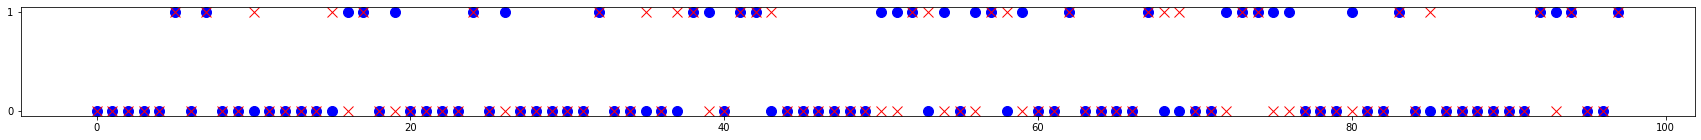

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[500, 500, 500], activation='tanh', alpha=10)
MLP.fit(X_train, y_train)
print('Scores for Random Forest')
print("Training set score: {:.3f}".format(model_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model_svm.score(X_test, y_test)))
y_pred = MLP.predict(X_test)
plt.rcParams['figure.figsize'] = [30, 2]
plt.plot(range(len(y_test)), y_test, 'bo', markersize=10)
plt.plot(range(len(y_pred)), y_pred, 'rx', markersize=10)
plt.yticks([0,1])
conf_mat=metrics.confusion_matrix(y_test,y_pred)
display(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
print(metrics.classification_report(y_test, y_pred))
TN=conf_mat[0,0]; TP=conf_mat[1,1]; FN=conf_mat[1,0]; FP=conf_mat[0,1]
print('  TN: ',TN,'  TP: ',TP,'  FN: ',FN,'  FP: ',FP)
sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)